In [1]:
import pandas as pd
url="https://bd29ee0e-54ab-4daa-9671-d153865d1620.usrfiles.com/ugd/bd29ee_e72c774cbd37478884a3bb16a6104258.csv"
df=pd.read_csv(url)
df.head()

,User country,Nr. reviews,Nr. hotel reviews,Helpful votes,Score,Period of stay,Traveler type,Pool,Gym,Tennis court,Spa,Casino,Free internet,Hotel name,Hotel stars,Nr. rooms,User continent,Member years,Review month,Review weekday
0,USA,11,4,13,5,Dec-Feb,Friends,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3,3773.0,North America,9.0,January,Thursday
1,USA,119,21,75,3,Dec-Feb,Business,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3,3773.0,North America,3.0,January,Friday
2,USA,36,9,25,5,Mar-May,Families,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3,3773.0,North America,2.0,February,Saturday
3,UK,14,7,14,4,Mar-May,Friends,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3,3773.0,Europe,6.0,February,Friday
4,Canada,5,5,2,4,Mar-May,Solo,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3,3773.0,North America,7.0,March,Tuesday


In [2]:
df.shape

(504, 20)

In [3]:
df.isna().any()

User country         False
Nr. reviews          False
Nr. hotel reviews    False
Helpful votes        False
Score                False
Period of stay       False
Traveler type        False
Pool                 False
Gym                  False
Tennis court         False
Spa                  False
Casino               False
Free internet        False
Hotel name           False
Hotel stars          False
Nr. rooms             True
User continent        True
Member years          True
Review month          True
Review weekday        True
dtype: bool

In [4]:
df=df.dropna()
df.shape

(408, 20)

In [5]:
df.isna().any()

User country         False
Nr. reviews          False
Nr. hotel reviews    False
Helpful votes        False
Score                False
Period of stay       False
Traveler type        False
Pool                 False
Gym                  False
Tennis court         False
Spa                  False
Casino               False
Free internet        False
Hotel name           False
Hotel stars          False
Nr. rooms            False
User continent       False
Member years         False
Review month         False
Review weekday       False
dtype: bool

In [6]:
dtypes=pd.DataFrame(df.dtypes).rename(columns={0:"Type"})
dtypes

,Type
User country,object
Nr. reviews,int64
Nr. hotel reviews,int64
Helpful votes,int64
Score,int64
Period of stay,object
Traveler type,object
Pool,object
Gym,object
Tennis court,object


In [7]:
objects=dtypes[dtypes["Type"]=="object"]
objects

,Type
User country,object
Period of stay,object
Traveler type,object
Pool,object
Gym,object
Tennis court,object
Spa,object
Casino,object
Free internet,object
Hotel name,object


In [8]:
object_index=objects.index.tolist()
object_index

['User country',
 'Period of stay',
 'Traveler type',
 'Pool',
 'Gym',
 'Tennis court',
 'Spa',
 'Casino',
 'Free internet',
 'Hotel name',
 'User continent',
 'Review month',
 'Review weekday']

In [9]:
objects=df[object_index]
objects.head()

,User country,Period of stay,Traveler type,Pool,Gym,Tennis court,Spa,Casino,Free internet,Hotel name,User continent,Review month,Review weekday
0,USA,Dec-Feb,Friends,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,North America,January,Thursday
1,USA,Dec-Feb,Business,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,North America,January,Friday
2,USA,Mar-May,Families,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,North America,February,Saturday
3,UK,Mar-May,Friends,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,Europe,February,Friday
4,Canada,Mar-May,Solo,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,North America,March,Tuesday


In [10]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
objects=objects.apply(le.fit_transform)
objects.head()

,User country,Period of stay,Traveler type,Pool,Gym,Tennis court,Spa,Casino,Free internet,Hotel name,User continent,Review month,Review weekday
0,41,0,3,0,0,0,0,1,1,2,3,4,4
1,41,0,0,0,0,0,0,1,1,2,3,4,0
2,41,2,2,0,0,0,0,1,1,2,3,3,2
3,40,2,3,0,0,0,0,1,1,2,2,3,0
4,3,2,4,0,0,0,0,1,1,2,3,7,5


In [11]:
numeric=dtypes[dtypes["Type"]!="object"]
numeric

,Type
Nr. reviews,int64
Nr. hotel reviews,int64
Helpful votes,int64
Score,int64
Hotel stars,int64
Nr. rooms,float64
Member years,float64


In [12]:
numeric_index=numeric.index.tolist()

In [13]:
numeric=df[numeric_index]
numeric.head()

,Nr. reviews,Nr. hotel reviews,Helpful votes,Score,Hotel stars,Nr. rooms,Member years
0,11,4,13,5,3,3773.0,9.0
1,119,21,75,3,3,3773.0,3.0
2,36,9,25,5,3,3773.0,2.0
3,14,7,14,4,3,3773.0,6.0
4,5,5,2,4,3,3773.0,7.0


In [14]:
df=pd.concat([numeric,objects],axis=1)
df.head()

,Nr. reviews,Nr. hotel reviews,Helpful votes,Score,Hotel stars,Nr. rooms,Member years,User country,Period of stay,Traveler type,Pool,Gym,Tennis court,Spa,Casino,Free internet,Hotel name,User continent,Review month,Review weekday
0,11,4,13,5,3,3773.0,9.0,41,0,3,0,0,0,0,1,1,2,3,4,4
1,119,21,75,3,3,3773.0,3.0,41,0,0,0,0,0,0,1,1,2,3,4,0
2,36,9,25,5,3,3773.0,2.0,41,2,2,0,0,0,0,1,1,2,3,3,2
3,14,7,14,4,3,3773.0,6.0,40,2,3,0,0,0,0,1,1,2,2,3,0
4,5,5,2,4,3,3773.0,7.0,3,2,4,0,0,0,0,1,1,2,3,7,5


In [15]:
X=df.drop(["Score"],axis=1)
X.head()

,Nr. reviews,Nr. hotel reviews,Helpful votes,Hotel stars,Nr. rooms,Member years,User country,Period of stay,Traveler type,Pool,Gym,Tennis court,Spa,Casino,Free internet,Hotel name,User continent,Review month,Review weekday
0,11,4,13,3,3773.0,9.0,41,0,3,0,0,0,0,1,1,2,3,4,4
1,119,21,75,3,3773.0,3.0,41,0,0,0,0,0,0,1,1,2,3,4,0
2,36,9,25,3,3773.0,2.0,41,2,2,0,0,0,0,1,1,2,3,3,2
3,14,7,14,3,3773.0,6.0,40,2,3,0,0,0,0,1,1,2,2,3,0
4,5,5,2,3,3773.0,7.0,3,2,4,0,0,0,0,1,1,2,3,7,5


In [16]:
y=df[["Score"]]
y.head()

,Score
0,5
1,3
2,5
3,4
4,4


In [17]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X=pd.DataFrame(scaler.fit_transform(X),columns=X.columns)
X.head()

,Nr. reviews,Nr. hotel reviews,Helpful votes,Hotel stars,Nr. rooms,Member years,User country,Period of stay,Traveler type,Pool,Gym,Tennis court,Spa,Casino,Free internet,Hotel name,User continent,Review month,Review weekday
0,-0.456307,-0.466854,-0.363823,-1.531582,1.047876,0.101252,0.770627,-1.355789,1.342712,-4.0,0.0,-0.5547,-2.738613,0.25,0.25,-1.224745,0.384247,-0.434524,0.469282
1,1.043970,0.270418,0.981487,-1.531582,1.047876,0.034262,0.770627,-1.355789,-1.419438,-4.0,0.0,-0.5547,-2.738613,0.25,0.25,-1.224745,0.384247,-0.434524,-1.499530
2,-0.109021,-0.250009,-0.103440,-1.531582,1.047876,0.023096,0.770627,0.440191,0.421995,-4.0,0.0,-0.5547,-2.738613,0.25,0.25,-1.224745,0.384247,-0.724207,-0.515124
3,-0.414633,-0.336747,-0.342124,-1.531582,1.047876,0.067757,0.709278,0.440191,1.342712,-4.0,0.0,-0.5547,-2.738613,0.25,0.25,-1.224745,-0.794496,-0.724207,-1.499530
4,-0.539656,-0.423485,-0.602507,-1.531582,1.047876,0.078922,-1.560651,0.440191,2.263428,-4.0,0.0,-0.5547,-2.738613,0.25,0.25,-1.224745,0.384247,0.434524,0.961485


In [18]:
scaler_y=StandardScaler()
y=pd.DataFrame(scaler_y.fit_transform(y),columns=y.columns)
y.head()

,Score
0,0.900090
1,-1.063742
2,0.900090
3,-0.081826
4,-0.081826


In [43]:
import numpy as np
from numpy import set_printoptions
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression


test = SelectKBest(score_func=mutual_info_regression, k="all")
fit = test.fit(X, np.asarray(y).reshape(y.shape[0],))
features = fit.transform(X)
set_printoptions(precision=3)

scores=fit.scores_
scores=pd.DataFrame(scores)
scores=scores.rename(columns={0:"scores"})
scores=scores.sort_values(by=["scores"],ascending=False)
scores

,scores
12,0.142325
4,0.103157
15,0.091590
7,0.064256
11,0.062294
3,0.038291
18,0.030266
6,0.029842
10,0.022468
9,0.014790


In [44]:
X_scores=scores[scores["scores"]>0]
len(X_scores)

12

In [45]:
X=X.iloc[:,X_scores.index]
X.head()

,Spa,Nr. rooms,Hotel name,Period of stay,Tennis court,Hotel stars,Review weekday,User country,Gym,Pool,Traveler type,Review month
0,-2.738613,1.047876,-1.224745,-1.355789,-0.5547,-1.531582,0.469282,0.770627,0.0,-4.0,1.342712,-0.434524
1,-2.738613,1.047876,-1.224745,-1.355789,-0.5547,-1.531582,-1.499530,0.770627,0.0,-4.0,-1.419438,-0.434524
2,-2.738613,1.047876,-1.224745,0.440191,-0.5547,-1.531582,-0.515124,0.770627,0.0,-4.0,0.421995,-0.724207
3,-2.738613,1.047876,-1.224745,0.440191,-0.5547,-1.531582,-1.499530,0.709278,0.0,-4.0,1.342712,-0.724207
4,-2.738613,1.047876,-1.224745,0.440191,-0.5547,-1.531582,0.961485,-1.560651,0.0,-4.0,2.263428,0.434524


In [46]:
from sklearn import svm
from sklearn import model_selection
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
import numpy as np

In [47]:
from sklearn import svm
SVM=svm.SVR(C=0.8,kernel="linear",epsilon=0.005)
scores = cross_val_score(SVM, X, np.asarray(y).reshape(y.shape[0],), scoring='neg_mean_absolute_error', cv=12)
print("Mean asbolute error (MAE) in standardized units: ",-scores.mean())

Mean asbolute error (MAE) in standardized units:  0.7059832556897465


In [48]:
y_pred = cross_val_predict(SVM, X, np.asarray(y).reshape(y.shape[0],), cv=12)

In [49]:
y_pred=scaler_y.inverse_transform(y)
y=scaler_y.inverse_transform(y)

In [50]:
from sklearn.metrics import mean_absolute_error as mae
print("Mean Absoltue Error （MAE): ",mae(y,y_pred))

Mean Absoltue Error （MAE):  0.0


In [51]:
MAPE=np.mean(np.abs((y - y_pred) / y)) * 100
print("MAPE: ",MAPE,"%")

MAPE:  0.0 %


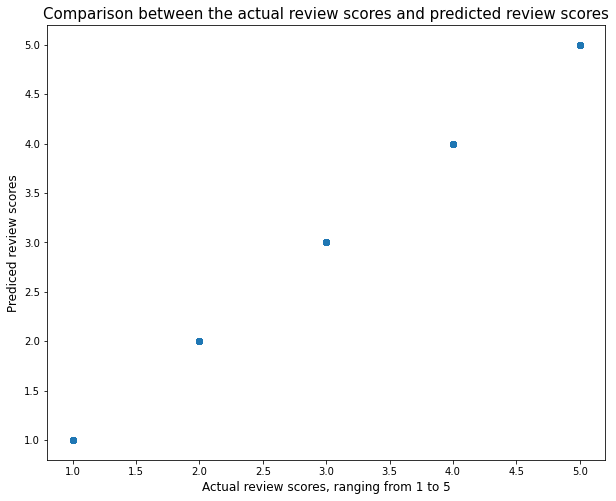

In [52]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
plt.scatter(y,y_pred)
plt.title("Comparison between the actual review scores and predicted review scores",fontsize=15)
plt.xlabel("Actual review scores, ranging from 1 to 5",fontsize=12)
plt.ylabel("Prediced review scores",fontsize=12)
plt.show()

#### Perfect!